# Titanic Survival Data Analysis

### Analysized the tarining titanic survival dataset to find patterns, and visualized the results. Still need to improve. And further could train the test data. 

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
df_copy = df.copy()

In [4]:
df = df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

In [10]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
impute_grps = df.pivot_table(index=['Pclass','Sex','FamilySize'],values = 'Age',aggfunc=np.mean)
impute_grps

Age
Pclass Sex              
1      female  34.638445
       male    41.345861
2      female  28.722973
       male    30.772348
3      female  21.818842
       male    26.632393

In [13]:
for i, row in df.iterrows():
    if pd.isnull(row['Age']):
        #print(df.loc[[i]])
        df.at[i, 'Age'] = impute_grps.loc[(row['Pclass'],row['Sex'], row['FamilySize'])]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      889 non-null object
FamilySize    891 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [15]:
df.Embarked[df.Embarked.isnull()] = df.Embarked.dropna().mode().values

/Users/ivy/Desktop/scraper/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',\
                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss') #Mademoiselle
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs') #Madame

## one-dimensional analysis

Text(0.5, 1.0, 'Sex and Survived')

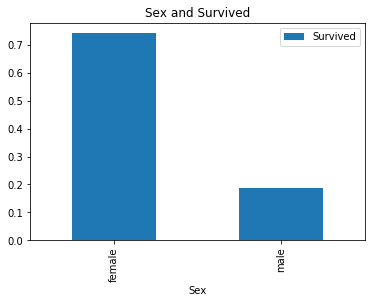

In [19]:
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
plt.title('Sex and Survived')

Text(0.5, 1.0, 'Title and Survived')

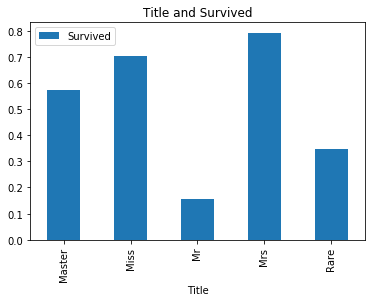

In [20]:
df[['Title', 'Survived']].groupby(['Title']).mean().plot.bar()
plt.title('Title and Survived')

Text(0.5, 1.0, 'Pclass and Survived')

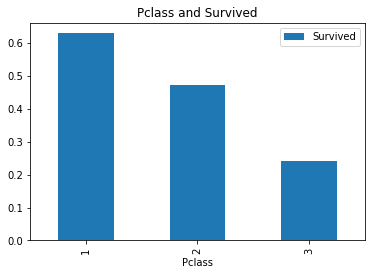

In [21]:
df[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()
plt.title('Pclass and Survived')

In [22]:
df['Age'].describe()

count    891.000000
mean      29.393852
std       13.282185
min        0.420000
25%       21.818842
50%       27.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

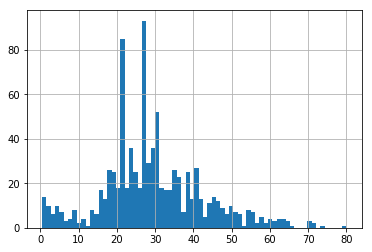

In [23]:
df['Age'].hist(bins=70)

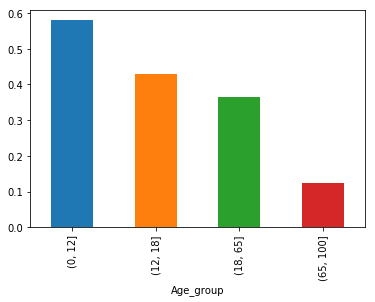

In [24]:
bins = [0, 12, 18, 65, 100]
df['Age_group'] = pd.cut(df['Age'], bins)
age_grp = df.groupby('Age_group')['Survived'].mean()
age_grp.plot(kind = 'bar')

/Users/ivy/Desktop/scraper/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


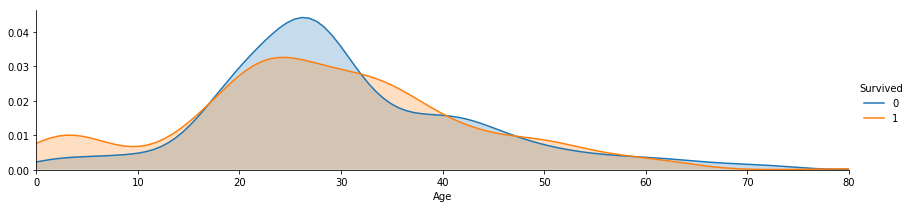

In [25]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

Text(0.5, 1.0, 'FamilySize and Survived')

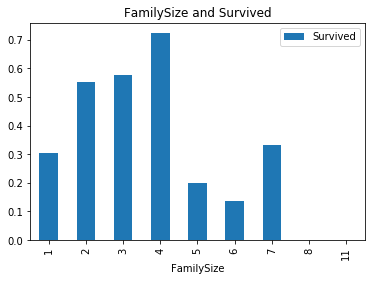

In [26]:
df[['FamilySize','Survived']].groupby(['FamilySize']).mean().plot.bar()
plt.title('FamilySize and Survived')

Text(0.5, 1.0, 'Embarked and Survived')

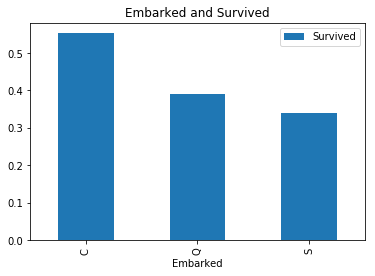

In [27]:
df[['Embarked','Survived']].groupby(['Embarked']).mean().plot.bar()
plt.title('Embarked and Survived')

## data transformation and visualization

In [28]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,Age_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Mr,"(18, 65]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Mrs,"(18, 65]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Miss,"(18, 65]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Mrs,"(18, 65]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Mr,"(18, 65]"


In [34]:
one_hot_encoded = pd.get_dummies(df['Embarked'],prefix='Embarked')
df = df.join(one_hot_encoded)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,Age_group,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,2,Mr,"(18, 65]",0,0,1,0,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,2,Mrs,"(18, 65]",0,0,0,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,1,Miss,"(18, 65]",0,1,0,0,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,2,Mrs,"(18, 65]",0,0,0,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,1,Mr,"(18, 65]",0,0,1,0,0,0,0,1
5,0,3,"Moran, Mr. James",male,29.184492,0,0,8.4583,Q,1,Mr,"(18, 65]",0,0,1,0,0,0,1,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,S,1,Mr,"(18, 65]",0,0,1,0,0,0,0,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,S,5,Master,"(0, 12]",1,0,0,0,0,0,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,S,3,Mrs,"(18, 65]",0,0,0,1,0,0,0,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,C,2,Mrs,"(12, 18]",0,0,0,1,0,1,0,0


In [35]:
df = df.drop(['Embarked'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null float64
FamilySize      891 non-null int64
Title           891 non-null object
Age_group       891 non-null category
Title_Master    891 non-null uint8
Title_Miss      891 non-null uint8
Title_Mr        891 non-null uint8
Title_Mrs       891 non-null uint8
Title_Rare      891 non-null uint8
Embarked_C      891 non-null uint8
Embarked_Q      891 non-null uint8
Embarked_S      891 non-null uint8
dtypes: category(1), float64(2), int64(5), object(3), uint8(8)
memory usage: 77.6+ KB


In [36]:
# one_hot_encoded2 = pd.get_dummies(df['Title'],prefix='Title')
# df = df.join(one_hot_encoded2)
df = df.drop(['Name', 'Title'], axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null object
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null float64
FamilySize      891 non-null int64
Age_group       891 non-null category
Title_Master    891 non-null uint8
Title_Miss      891 non-null uint8
Title_Mr        891 non-null uint8
Title_Mrs       891 non-null uint8
Title_Rare      891 non-null uint8
Embarked_C      891 non-null uint8
Embarked_Q      891 non-null uint8
Embarked_S      891 non-null uint8
dtypes: category(1), float64(2), int64(5), object(1), uint8(8)
memory usage: 63.7+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Age_group,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,2,"(18, 65]",0,0,1,0,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,2,"(18, 65]",0,0,0,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,1,"(18, 65]",0,1,0,0,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,2,"(18, 65]",0,0,0,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,1,"(18, 65]",0,0,1,0,0,0,0,1


In [37]:
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null int64
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null float64
FamilySize      891 non-null int64
Age_group       891 non-null category
Title_Master    891 non-null uint8
Title_Miss      891 non-null uint8
Title_Mr        891 non-null uint8
Title_Mrs       891 non-null uint8
Title_Rare      891 non-null uint8
Embarked_C      891 non-null uint8
Embarked_Q      891 non-null uint8
Embarked_S      891 non-null uint8
dtypes: category(1), float64(2), int64(6), uint8(8)
memory usage: 63.7 KB


In [44]:
# df['Age_group'] = df['Age_group'].map( {'(0, 12]': 0,'(12, 18]': 1, '(18, 65]': 2, '(65, 100]':3} ).astype(int)
# df.info()

In [42]:
df = df.drop(['Age_group'], axis=1)

In [43]:
from sklearn import preprocessing
min_max_scaler  = preprocessing.MinMaxScaler()

df_scale_min_max = min_max_scaler.fit_transform(df.loc[:, df.columns != 'Survived'])
df_scale_min_max = pd.DataFrame(df_scale_min_max,columns = df.columns[df.columns != 'Survived'])
df_scale_min_max.head(5)

/Users/ivy/Desktop/scraper/venv/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.271174,0.125,0.0,0.014151,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.472229,0.125,0.0,0.139136,0.1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.434531,0.125,0.0,0.103644,0.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.434531,0.000,0.0,0.015713,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [45]:
df_final = df[['Survived']].join(df_scale_min_max)
df_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,0,1.0,0.0,0.271174,0.125,0.0,0.014151,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,0.0,1.0,0.472229,0.125,0.0,0.139136,0.1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0.0,1.0,0.434531,0.125,0.0,0.103644,0.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,1.0,0.0,0.434531,0.000,0.0,0.015713,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [48]:
Correlation = pd.DataFrame(df_final[
 ['Pclass', 'Sex','Age','Fare','FamilySize','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Rare','Embarked_C','Embarked_Q','Embarked_S' ]])


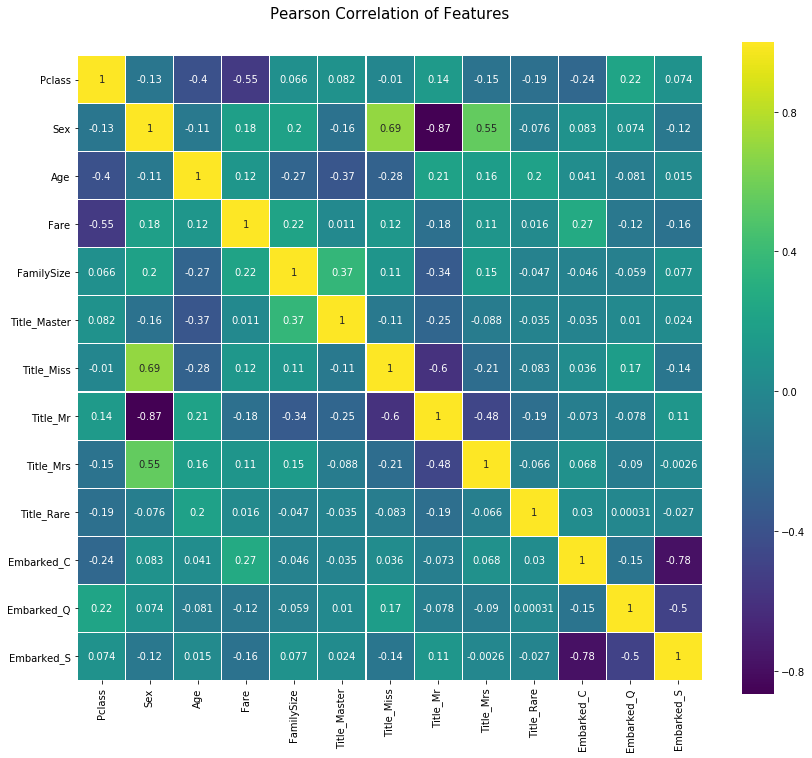

In [49]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

/Users/ivy/Desktop/scraper/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


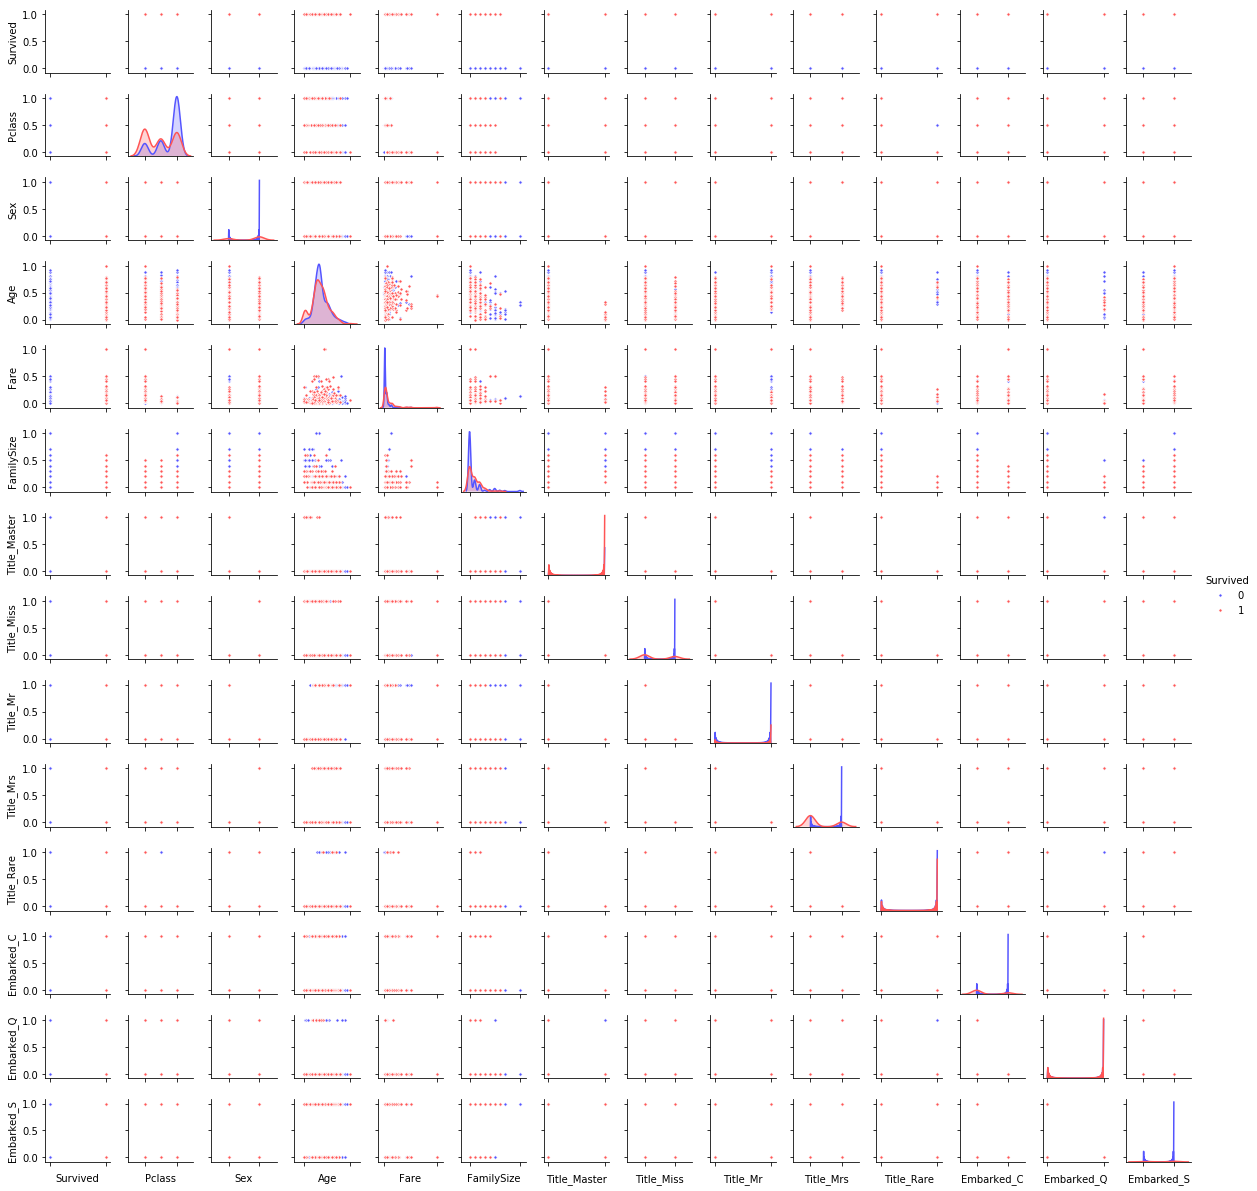

In [55]:
g = sns.pairplot(df_final[[u'Survived', u'Pclass', u'Sex', u'Age', u'Fare',
    u'FamilySize',u'Title_Master',u'Title_Miss',u'Title_Mr',u'Title_Mrs',u'Title_Rare',u'Embarked_C',u'Embarked_Q',u'Embarked_S']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])